In [1]:
import rastereasy


In [2]:
name_im='./data/demo/sentinel.tif'
image=rastereasy.Geoimage(name_im)


## Extract numpy arrays

### 1) Channel first format

In [3]:
im=image.numpy_channel_first()
print(im.shape)


(12, 1000, 1000)


In [4]:
### 2) Channel last format

In [5]:
im=image.numpy_channel_last()
print(im.shape)


(1000, 1000, 12)


## Some channels in numpy array

### a) If names are not given 

In [6]:
bands=["1","4","3"]
im=image.numpy_channel_first(bands=bands)
print(im.shape)
bands=[1,4,3,8]
im=image.numpy_channel_last(bands=bands)
print(im.shape)


(3, 1000, 1000)
(1000, 1000, 4)


### b) If names are given 

In [7]:
# first : change the names of the image
names = {"NIR":8,"G":3,"CO" : 1,"SWIR2":11,"B": 2,"R":4,"RE1":5,"RE2":6,"RE3":7,"WA":9,"SWIR1":10,"SWIR3":12}
image.change_names(names)
image.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE3': 7, 'NIR': 8, 'WA': 9, 'SWIR1': 10, 'SWIR2': 11, 'SWIR3': 12}




In [8]:
bands=["R","G","B"]
im=image.numpy_channel_first(bands=bands)
print(im.shape)
bands=["R","NIR","G","B"]
im=image.numpy_channel_last(bands=bands)
print(im.shape)


(3, 1000, 1000)
(1000, 1000, 4)


## Entire image in table of size (row*col, bands)

In [9]:
help(image.numpy_table)

Help on method numpy_table in module rastereasy.rastereasy:

numpy_table(bands=None) method of rastereasy.rastereasy.Geoimage instance
    Extract image data as a 2D table of shape (pixels, bands).

    This method reshapes the image into a 2D table where each row represents a pixel
    and each column represents a band. This format is useful for machine learning,
    statistical analysis, or any operation that treats pixels as independent samples.

    Parameters
    ----------
    bands : str, list of str, or None, optional
        The bands to include in the output:
        - If None: Returns all bands
        - If a string: Returns a single specified band
        - If a list: Returns the specified bands in the given order
        Default is None.

    Returns
    -------
    numpy.ndarray
        Image data as a 2D table with shape (rows*cols, bands)

    Examples
    --------
    >>> # Convert the entire image to a table
    >>> table = image.numpy_table()
    >>> print(f"Table sh

In [10]:
table=image.numpy_table()
print(table.shape)

(1000000, 12)


## Recovering an image from a table


In [11]:
help(rastereasy.table2image)

Help on function table2image in module rastereasy.rastereasy:

table2image(table, size, channel_first=True)
    Reshape a 2D table back into a 3D image.

    Parameters
    ----------
    table : numpy.ndarray
        Input table with shape (rows*cols, bands) or (rows*cols,).
    size : tuple
        Size of the output image as (rows, cols).
    channel_first : bool, optional
        If True, output will have shape (bands, rows, cols).
        If False, output will have shape (rows, cols, bands).
        Default is True.

    Returns
    -------
    numpy.ndarray
        Reshaped 3D image.

    Examples
    --------
    >>> image = table2image(table, (400, 600), channel_first=True)



In [12]:
# Test with channel first recovery
image_recovered=rastereasy.table2image(table,image.shape)
image_recovered.shape

(12, 1000, 1000)

In [13]:
# check the consistency
import numpy as np
print(np.sum(np.abs(image_recovered-image.numpy_channel_first())))
print(image_recovered.shape)
# Test with channel last recovery
image_recovered=rastereasy.table2image(table,image.shape,channel_first=False)
print(np.sum(np.abs(image_recovered-image.numpy_channel_last())))
print(image_recovered.shape)


0
(12, 1000, 1000)
0
(1000, 1000, 12)


## Creating an image from a table

 We can directly create a geoimage from the table. Dimensions should match



- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'B': 1, 'G': 2, 'R': 3}




<Figure size 640x480 with 0 Axes>

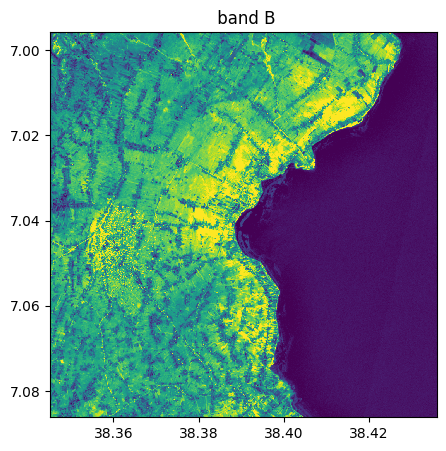

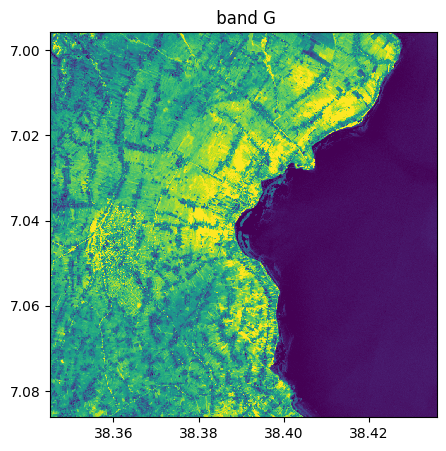

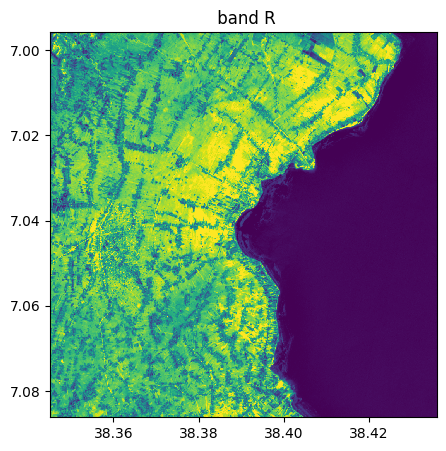

<Figure size 640x480 with 0 Axes>

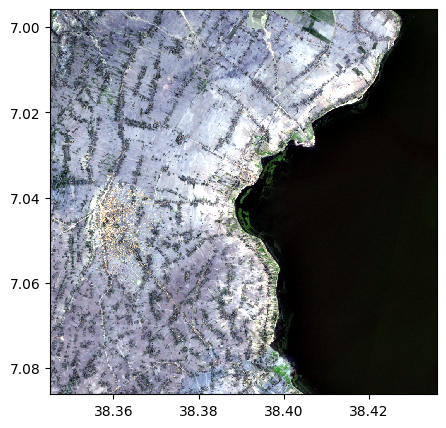

In [14]:
image_recovered=image.image_from_table(table[:,1:4],names={"R":3,"G":2,"B":1})
image_recovered.info()

image_recovered.visu()
image_recovered.colorcomp()
